In [1]:
library(ggplot2)
library(data.table)
theme_set(theme_bw())

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘data.table’ was built under R version 4.2.3”


In [2]:
strats = fread('stratified_genome_metadata.tsv')
setnames(strats, 'genome_ID', 'genome')

In [3]:
tools = c('singlem', 'metaphlan', 'motus', 'kraken', 'sourmash', 'kaiju', 'map2b', 'metabuli')
# Tools that do not have the correct taxonomy are tested only at the domain level. eg. Kaiju has NCBI taxonomy and MAP2B uses GTDB v202
correct_taxonomy_tools = c('singlem', 'metaphlan', 'kraken', 'sourmash', 'metabuli')

publication_names = data.table(
    tool = tools,
    publication_name = c('SingleM', 'MetaPhlAn', 'mOTUs', 'Kraken2', 'sourmash', 'Kaiju', 'MAP2B', 'Metabuli')
)
name_to_publication_name = function(names, correct_taxonomy_only=F){
    to_return = c()
    for (name in names){
        to_return = c(to_return, publication_names[tool==name]$publication_name)
    }
    if (correct_taxonomy_only){
        return(factor(to_return, levels=publication_names[tool %in% correct_taxonomy_tools]$publication_name))
    } else {
        return(factor(to_return, levels=publication_names$publication_name))
    }
}

In [4]:
d1 = data.table(expand.grid(tool=tools, genome=strats$genome))
d1[, method := 'relabund']
d1[tool=='kraken', method := 'reads_wise']
d1[tool=='kaiju', method := 'reads_wise']
d1[tool=='metabuli', method := 'reads_wise']
d1[1:3]

tool,genome,method
<fct>,<fct>,<chr>
singlem,GCA_019422935.1_genomic,relabund
metaphlan,GCA_019422935.1_genomic,relabund
motus,GCA_019422935.1_genomic,relabund


In [5]:
# output_singlem/opal/GCA_022615805.1_genomic.opal_report
d2 = d1[, fread(paste('output_',tool,sep='','/opal/',genome,'.',method,'.opal_report')), by=list(tool,genome)]
d2[1:3]

tool,genome,tool,rank,metric,sample,value
<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,Gold standard,kingdom,Bray-Curtis distance,SAMPLEID,0
singlem,GCA_019422935.1_genomic,Gold standard,phylum,Bray-Curtis distance,SAMPLEID,0
singlem,GCA_019422935.1_genomic,Gold standard,class,Bray-Curtis distance,SAMPLEID,0


In [6]:
dim(d2)

[1] 173659      7

In [7]:
setnames(d2, c('tool','genome','blah','rank','metric','sample','value'))
d3 = d2[blah != 'Gold standard'][,.(tool, genome, rank, metric, value)]
d3[1:3]
dim(d3)

tool,genome,rank,metric,value
<fct>,<fct>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.04558075
singlem,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.03920188
singlem,GCA_019422935.1_genomic,class,Bray-Curtis distance,0.03807286


[1] 86299     5

In [8]:
bc = d3[metric=='Bray-Curtis distance']
dim(bc)
bc[1:10]

[1] 6720    5

tool,genome,rank,metric,value
<fct>,<fct>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.04558075
singlem,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.03920188
singlem,GCA_019422935.1_genomic,class,Bray-Curtis distance,0.03807286
singlem,GCA_019422935.1_genomic,order,Bray-Curtis distance,0.03807286
singlem,GCA_019422935.1_genomic,family,Bray-Curtis distance,0.03694118
singlem,GCA_019422935.1_genomic,genus,Bray-Curtis distance,0.03580683
singlem,GCA_019422935.1_genomic,species,Bray-Curtis distance,0.47977853
metaphlan,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.11514890
metaphlan,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.11514890


In [9]:
bc2 = merge(bc, strats, by='genome')
bc2[1:10]

genome,tool,rank,metric,value,novelty_category,taxonomy
<chr>,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>
GCA_013154095.1_genomic,singlem,kingdom,Bray-Curtis distance,0.001621622,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,phylum,Bray-Curtis distance,0.408025682,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,class,Bray-Curtis distance,0.397779229,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,order,Bray-Curtis distance,0.377237420,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,family,Bray-Curtis distance,0.334776335,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,genus,Bray-Curtis distance,0.334776335,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,species,Bray-Curtis distance,0.334776335,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,metaphlan,kingdom,Bray-Curtis distance,0.500000000,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,metaphlan,phylum,Bray-Curtis distance,0.500000000,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095


In [10]:
orders = c('kingdom','phylum','class','order','family','genus','species')
novel_orders = gsub('^','novel ',orders)
bc2[, rank := factor(rank, levels=orders)]
bc2[, novelty_category := factor(novelty_category, levels=orders)]

In [11]:
bc2[, kingdom := gsub('d__', 'novel ', gsub(';.*','',taxonomy))]
bc2[, novelty_category_novel := factor(gsub('^','novel ',novelty_category), levels=novel_orders)]
bc2[1:3]

genome,tool,rank,metric,value,novelty_category,taxonomy,kingdom,novelty_category_novel
<chr>,<fct>,<fct>,<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
GCA_013154095.1_genomic,singlem,kingdom,Bray-Curtis distance,0.001621622,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum
GCA_013154095.1_genomic,singlem,phylum,Bray-Curtis distance,0.408025682,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum
GCA_013154095.1_genomic,singlem,class,Bray-Curtis distance,0.397779229,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum


Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


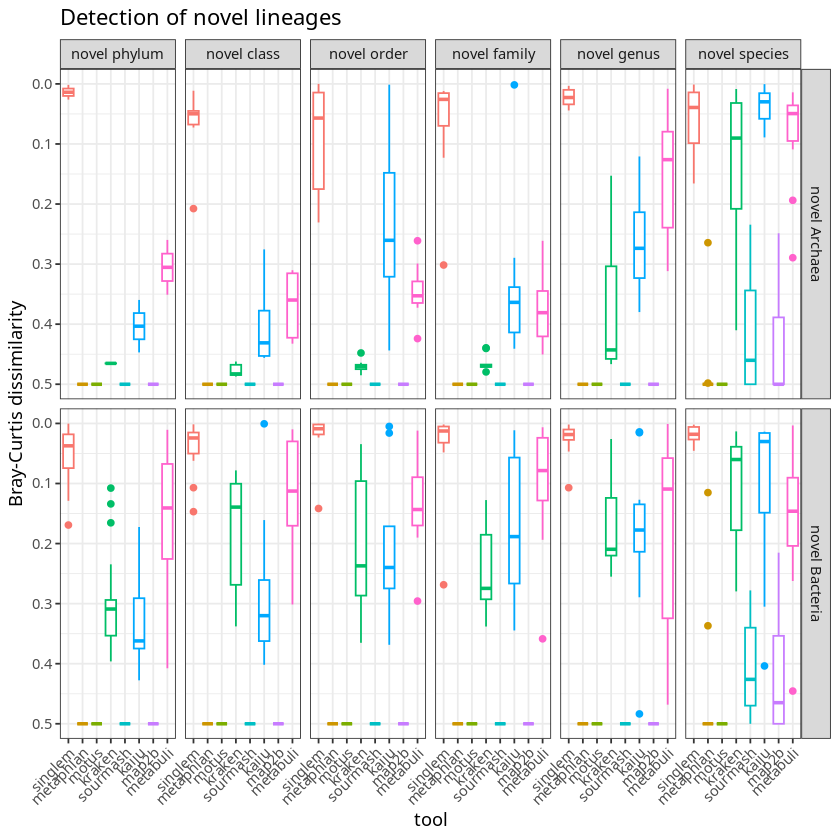

In [12]:
qplot(data=bc2[rank=='kingdom'], tool, value, geom='boxplot', main='Detection of novel lineages', colour=tool, ylab='Bray-Curtis dissimilarity')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [13]:
# stats
bc2[rank=='kingdom', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.0451357,0.05868843
metaphlan,0.4934534,0.04349317
motus,0.5000000,0.00000000
kraken,0.2796047,0.15296201
sourmash,0.4851940,0.04954260
kaiju,0.2405406,0.14403088
map2b,0.4883699,0.04776870
metabuli,0.1864650,0.13986454


In [14]:
bc2[rank=='kingdom' & kingdom=='novel Archaea', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.05829849,0.07067607
metaphlan,0.49505016,0.03400395
motus,0.50000000,0.00000000
kraken,0.38191544,0.15352905
sourmash,0.48173473,0.05882015
kaiju,0.24956676,0.15678249
map2b,0.48836996,0.04699890
metabuli,0.25757178,0.14171901


In [15]:
bc2[rank=='kingdom' & kingdom=='novel Bacteria', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.03636051,0.04765555
metaphlan,0.49238883,0.04901256
motus,0.50000000,0.00000000
kraken,0.21139757,0.10870844
sourmash,0.48750012,0.04254468
kaiju,0.23452318,0.13566889
map2b,0.48836980,0.04860328
metabuli,0.13906050,0.11745145


In [16]:
bc2[rank=='kingdom' & novelty_category=='species', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.03848830,0.04498119
metaphlan,0.46072015,0.10244175
motus,0.50000000,0.00000000
kraken,0.12540864,0.11964593
sourmash,0.41116379,0.09192407
kaiju,0.07187762,0.10582700
map2b,0.43021917,0.10010097
metabuli,0.12239389,0.11459908


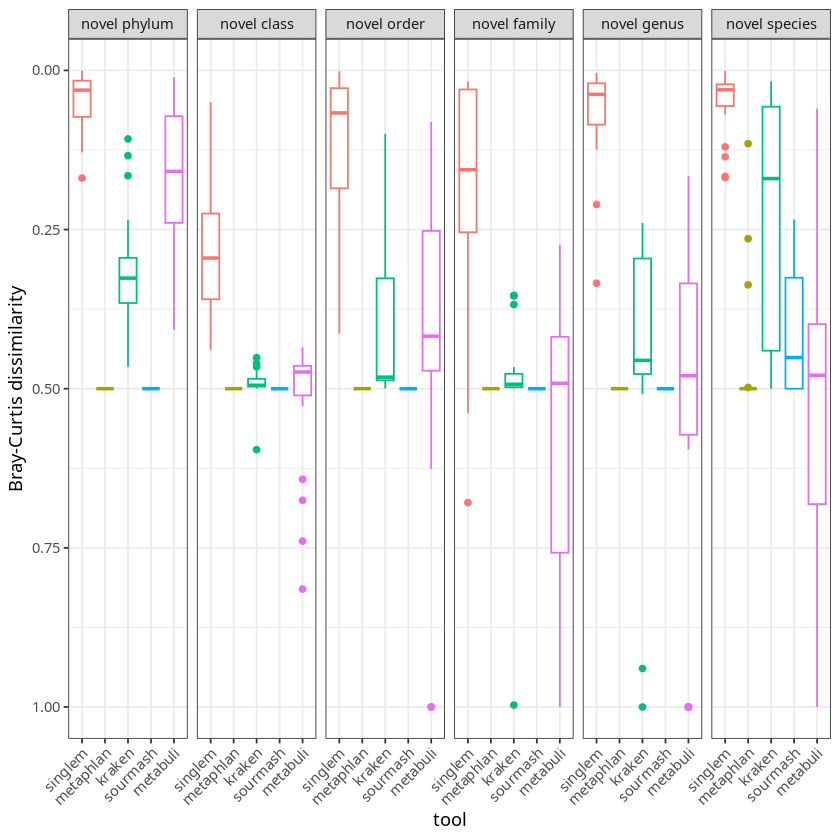

In [17]:
# What about when the rank equals the novelty category?
qplot(data=bc2[tool %in% correct_taxonomy_tools][rank==orders[as.numeric(novelty_category)-1]], ylab='Bray-Curtis dissimilarity', tool, colour=tool, value, geom='boxplot')+facet_grid(.~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [18]:
# stats
bc2[tool %in% correct_taxonomy_tools][rank==orders[as.numeric(novelty_category)-1]][, .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.1270137,0.13812730
metaphlan,0.4934534,0.04349317
kraken,0.3972279,0.16879398
sourmash,0.4853219,0.04904664
metabuli,0.4538752,0.25732684


In [19]:
bc2[tool %in% correct_taxonomy_tools][tool != 'singlem'][rank==orders[as.numeric(novelty_category)-1]][, .(ave=mean(value), sd=sd(value)), by=list(tool)][,.(ave=mean(ave), sd=mean(sd))]

ave,sd
<dbl>,<dbl>
0.4574696,0.1296652


In [20]:
bc2[tool == 'singlem' & novelty_category_novel=='novel class'][rank==orders[as.numeric(novelty_category)-1]][order(-value)]

genome,tool,rank,metric,value,novelty_category,taxonomy,kingdom,novelty_category_novel
<chr>,<fct>,<fct>,<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
GCA_024720975.1_genomic,singlem,phylum,Bray-Curtis distance,0.43876904,class,d__Archaea;p__Thermoproteota;c__JANJXX01;o__JANJXX01;f__JANJXX01;g__JANJXX01;s__JANJXX01 sp024720975,novel Archaea,novel class
GCA_021163045.1_genomic,singlem,phylum,Bray-Curtis distance,0.43210283,class,d__Archaea;p__Thermoproteota;c__JANJXX01;o__JANJXX01;f__JANJXX01;g__JAGGXM01;s__JAGGXM01 sp021163045,novel Archaea,novel class
GCA_023475165.1_genomic,singlem,phylum,Bray-Curtis distance,0.38217338,class,d__Bacteria;p__Bacillota_E;c__JAMCWA01;o__JAMCWA01;f__JAMCWA01;g__JAMCWA01;s__JAMCWA01 sp023475165,novel Bacteria,novel class
GCA_022072165.1_genomic,singlem,phylum,Bray-Curtis distance,0.37473747,class,d__Bacteria;p__4484-113;c__JAJVIF01;o__JAJVIF01;f__JAJVIF01;g__JAJVIF01;s__JAJVIF01 sp022072165,novel Bacteria,novel class
GCA_021803575.1_genomic,singlem,phylum,Bray-Curtis distance,0.37102804,class,d__Bacteria;p__Bacillota_E;c__JAJZYS01;o__JAJZYS01;f__JAJZLH01;g__JAJZLH01;s__JAJZLH01 sp021803575,novel Bacteria,novel class
GCA_021791495.1_genomic,singlem,phylum,Bray-Curtis distance,0.35556995,class,d__Bacteria;p__Bacillota_E;c__JAJYWN01;o__JAJYWN01;f__JAJYWN01;g__JAJYWN01;s__JAJYWN01 sp021791495,novel Bacteria,novel class
GCA_022763185.1_genomic,singlem,phylum,Bray-Curtis distance,0.35358597,class,d__Bacteria;p__Bdellovibrionota;c__JALEGL01;o__JALEGL01;f__JALEGL01;g__JALEGL01;s__JALEGL01 sp022763185,novel Bacteria,novel class
GCA_021811325.1_genomic,singlem,phylum,Bray-Curtis distance,0.34263566,class,d__Bacteria;p__Bacillota_E;c__JAJYWN01;o__JAJYWN01;f__JAJZPE01;g__JAJZPE01;s__JAJZPE01 sp021811325,novel Bacteria,novel class
GCA_021162905.1_genomic,singlem,phylum,Bray-Curtis distance,0.33560754,class,d__Archaea;p__Asgardarchaeota;c__JAGGXT01;o__JAGGXT01;f__JAGGXT01;g__JAGGXT01;s__JAGGXT01 sp021162905,novel Archaea,novel class


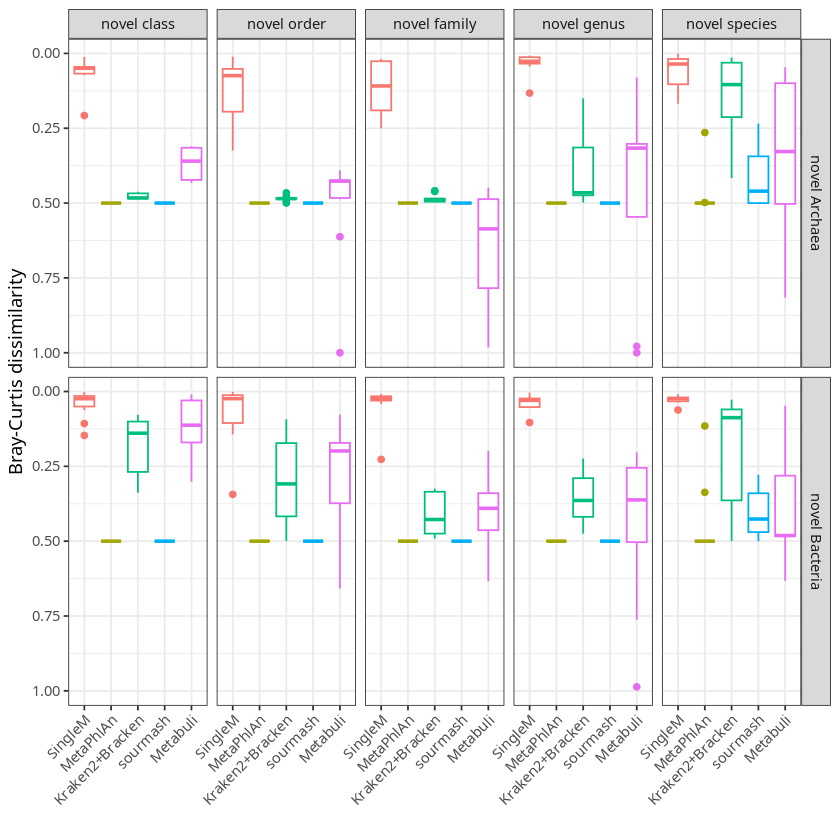

In [31]:
# What about when the rank equals one level above the novelty category?
bc2[tool=='singlem', tool2 := 'SingleM']
bc2[tool=='metaphlan', tool2 := 'MetaPhlAn']
bc2[tool=='motus', tool2 := 'mOTUs']
bc2[tool=='kraken', tool2 := 'Kraken2+Bracken']
bc2[tool=='sourmash', tool2 := 'sourmash']
bc2[tool=='kaiju', tool2 := 'Kaiju']
bc2[tool=='coverm', tool2 := 'CoverM']
bc2[tool=='metabuli', tool2 := 'Metabuli']
tools2_order = c('SingleM','MetaPhlAn','Kraken2+Bracken','sourmash','Metabuli')
bc2[, tool2 := factor(tool2, levels=tools2_order)]

bc2[, novelty_category_novel := factor(gsub('^','novel ',novelty_category), levels=novel_orders)]

qplot(data=bc2[tool %in% correct_taxonomy_tools][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-2]], colour=tool, ylab='Bray-Curtis dissimilarity', tool2, value, geom='boxplot', xlab='')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [22]:
bc2[tool %in% correct_taxonomy_tools][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-2]][, .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.06139236,0.07157848
metaphlan,0.49214403,0.04757540
kraken,0.33071294,0.16392154
sourmash,0.48224023,0.05382798
metabuli,0.38211357,0.23985176


In [23]:
# Write out data for plotting benchmarks altogether
fwrite(bc2, 'bray_curtis.tsv', sep='\t')

# How much does SingleM over-classify to the species level?

In [24]:
# Read in the singlem .profile file for each species
profiles = data.table(expand.grid(tool=tools, genome=strats$genome))
profiles2 = profiles[, fread(paste('output_',tool,'/',tool,'/',genome,'.profile',sep=''), sep='\t',colClasses=c('character','numeric','character')), by=.(tool,genome)]
profiles2[1:3]

tool,genome,sample,coverage,taxonomy
<fct>,<fct>,<chr>,<dbl>,<chr>
singlem,GCA_019422935.1_genomic,GCA_019422935.1_genomic.1,0.46,Root; d__Archaea
singlem,GCA_019422935.1_genomic,GCA_019422935.1_genomic.1,0.16,Root; d__Bacteria
singlem,GCA_019422935.1_genomic,GCA_019422935.1_genomic.1,0.05,Root; d__Archaea; p__Halobacteriota


In [25]:
# Only care about s__ entries. Then order by abundance reverse, remove the top one.
get_abundance_of_non_top_species = function(sd) {
    # sd[, is_non_novel := F]
    # sd[grep('s__Staphylococcus aureus', taxonomy), is_non_novel := T]
    # sd[grep('s__Methanobrevibacter ruminantium', taxonomy), is_non_novel := T]
    return(sd[is_non_novel==F, sum(coverage)] / sum(sd$coverage))
    # print(sd)
    # if (nrow(sd) == 1) {
    #     return(0)
    # } else {
    #     return(sd[2:nrow(sd), sum(coverage)] / sum(sd$coverage[1]))
    # }
}
profiles2[, is_non_novel := F]

# Read genome_pairs.tsv and extract
genome_pairs = fread('genome_pairs.tsv',sep='\t')
for (tax in genome_pairs$paired_taxonomy){
    profiles2[grep(gsub('.*;','',tax), taxonomy), is_non_novel := T]
}
# profiles2[grep('s__Staphylococcus aureus', taxonomy), is_non_novel := T]
# profiles2[grep('s__Methanobrevibacter ruminantium', taxonomy), is_non_novel := T]

overclassification_rates = profiles2[grep('s__',taxonomy)][order(-coverage)][,.(overclassification=get_abundance_of_non_top_species(.SD)), by=.(tool,genome)]
summary(overclassification_rates[tool=='singlem']$overclassification)

overclassification_rates[tool=='singlem'][overclassification > 0.3]
table(overclassification_rates$tool)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.02765 0.00000 0.44165 

tool,genome,overclassification
<fct>,<fct>,<dbl>
singlem,GCA_019422935.1_genomic,0.4390366
singlem,GCA_020161365.1_genomic,0.4416527
singlem,GCA_019459085.1_genomic,0.3458274
singlem,GCA_022678445.1_genomic,0.3190994
singlem,GCF_021184045.1_genomic,0.4118051
singlem,GCF_024707485.1_genomic,0.4122807



  singlem metaphlan     motus    kraken  sourmash     kaiju     map2b  metabuli 
      120       120       120       120       120       120       120       120 

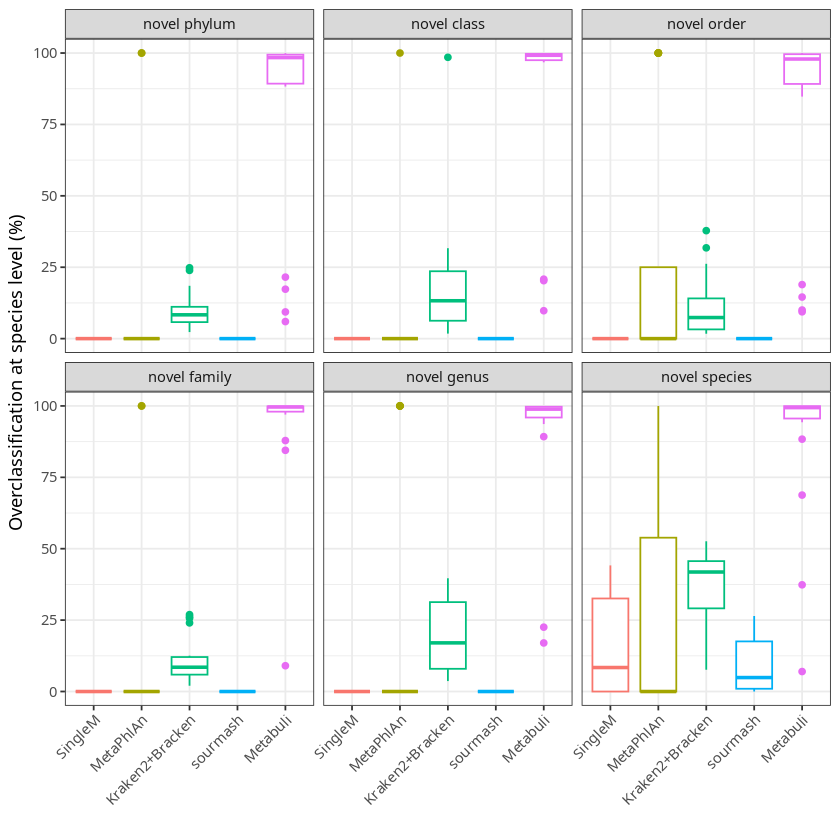

In [32]:
# What about per-taxon level?
overclassification_rates2 = merge(overclassification_rates, strats, by='genome')

overclassification_rates2[tool=='singlem', tool2 := 'SingleM']
overclassification_rates2[tool=='metaphlan', tool2 := 'MetaPhlAn']
overclassification_rates2[tool=='motus', tool2 := 'mOTUs']
overclassification_rates2[tool=='kraken', tool2 := 'Kraken2+Bracken']
overclassification_rates2[tool=='sourmash', tool2 := 'sourmash']
overclassification_rates2[tool=='kaiju', tool2 := 'Kaiju']
overclassification_rates2[tool=='coverm', tool2 := 'CoverM']
overclassification_rates2[tool=='map2b', tool2 := 'MAP2B']
overclassification_rates2[tool=='metabuli', tool2 := 'Metabuli']
tools2_order = c('SingleM','MetaPhlAn','mOTUs','Kraken2+Bracken','sourmash','Kaiju','CoverM','Metabuli')
overclassification_rates2[, tool2 := factor(tool2, levels=tools2_order)]

overclassification_rates2[, novelty_category_novel := factor(gsub('^','novel ',novelty_category), levels=novel_orders)]

qplot(data=overclassification_rates2[tool %in% correct_taxonomy_tools][tool != 'coverm'], tool2, overclassification*100, ylab='Overclassification at species level (%)', xlab='', geom='boxplot', colour=tool2)+facet_wrap(~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')

In [27]:
# So at the novel species level
summary(overclassification_rates2[tool=='singlem'][novelty_category=='species', overclassification])
sd(overclassification_rates2[tool=='singlem'][novelty_category=='species', overclassification])
summary(overclassification_rates2[tool=='metaphlan'][novelty_category=='species', overclassification])
summary(overclassification_rates2[tool=='motus'][novelty_category=='species', overclassification])
summary(overclassification_rates2[tool=='kraken'][novelty_category=='species', overclassification])
summary(overclassification_rates2[tool=='sourmash'][novelty_category=='species', overclassification])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.08402 0.16587 0.32578 0.44165 

[1] 0.1805965

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2893  0.5386  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0764  0.2912  0.4184  0.3602  0.4566  0.5261 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.009719 0.048862 0.088970 0.175490 0.264388 

In [28]:
# Overclassification to species level of kraken when genome is more novel than species-level
summary(overclassification_rates2[tool=='kraken'][novelty_category!='species', overclassification])
sd(overclassification_rates2[tool=='kraken'][novelty_category!='species', overclassification])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01713 0.05778 0.09143 0.13818 0.21170 0.98501 

[1] 0.1302636